# Monte Carlo Integration

This notebook demonstrates using Monte Carlo methods to calculate $\pi$ and evaluate integrals numerically.

## Author
James Bott

## Calculating $\pi$

As an example of using a Monte-Carlo numerical method the following code calculates the value of $\pi$.


After 1000 trials, 796 samples fall within the circle.
The estimated value of Pi is: 3.184


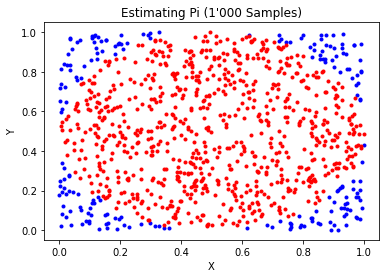

In [400]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Create 1000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(1000,2)))
df['Inside'] = df.apply(lambda row: ((row["X"] - 0.5)**2 + (row["Y"] - 0.5)**2) <= 0.5**2, axis=1)

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")

# Create a plot
plt.scatter(df[df["Inside"] == False]["X"], df[df["Inside"] == False]["Y"], color="b", marker=".")
plt.scatter(df[df["Inside"] == True]["X"], df[df["Inside"] == True]["Y"], color="r", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimating Pi (1'000 Samples)")
plt.show()


Extending to 100`000 points:

After 100000 trials, 78661 samples fall within the circle.
The estimated value of Pi is: 3.14644


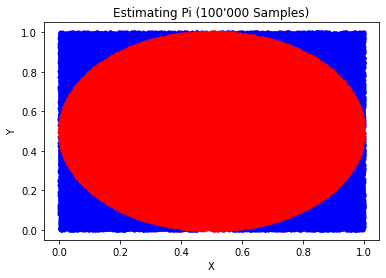

In [2]:
# Create 100`000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(100000,2)))
df['Inside'] = df.apply(lambda row: ((row["X"] - 0.5)**2 + (row["Y"] - 0.5)**2) <= 0.5**2, axis=1)

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")

# Create a plot
plt.scatter(df[df["Inside"] == False]["X"], df[df["Inside"] == False]["Y"], color="b", marker=".")
plt.scatter(df[df["Inside"] == True]["X"], df[df["Inside"] == True]["Y"], color="r", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Estimating Pi (100'000 Samples)")
plt.show()


We can further extend to 100'000'000 samples using vectroized operations in Pandas:

In [3]:
# Create 100`000`000 samples drawn from a uniform distribution 
df = pd.DataFrame(columns = ("X","Y"), data = np.random.uniform((0,0),(1,1),(100000000,2)))

# Using vector operations to improve performance
df['Inside'] = (df['X'] * df['X'] - 2*0.5*df['X'] + 0.5*0.5 + df['Y'] * df['Y'] - 2*0.5*df['Y'] + 0.5**2) <= 0.5**2

piCalculated = (df['Inside'].sum() / df.shape[0]) / (0.5**2)

# Summarise results 
print(f"After {df.shape[0]} trials, {df['Inside'].sum()} samples fall within the circle.")
print(f"The estimated value of Pi is: {piCalculated}")


After 100000000 trials, 78540642 samples fall within the circle.
The estimated value of Pi is: 3.14162568


## Calculating the Integral of $x^2$

This first example calculates the definite integral of $x^2$ in the range [0, 100]. It is trivial to find the integral of $x^2$ analytically and this allows us to easily verify the result of the Monte-Carlo numerical method. 



The analytical value of the integral: 333333.3333333333

Samples   Monte Carlo Integral   Error
------------------------------------------------------------
10000     332793.16451467585 2994.964492956252
20000     335457.7553626781 2119.320436318445
30000     332588.8065439762 1721.9875556385955
40000     331962.0250924586 1492.6028976381776
50000     331231.6998518563 1332.9951487109086
60000     330847.476649525 1215.7257563409862
70000     330740.98250836134 1125.060036532317
80000     331374.07336607616 1052.9730110823298
90000     331893.30631007487 992.94462138328
100000     331962.23497734213 941.5538923569043
110000     332285.8641209735 898.2039149222504
120000     332550.6745093025 860.6158048671463
130000     332081.24849009444 826.0094769618977
140000     332225.002350844 796.0860100724509
150000     332412.781861358 769.7569013879972
160000     332233.6599360901 745.067197174552
170000     332110.7010364814 722.7607691730228
180000     332093.64237803477 702.3864289811809


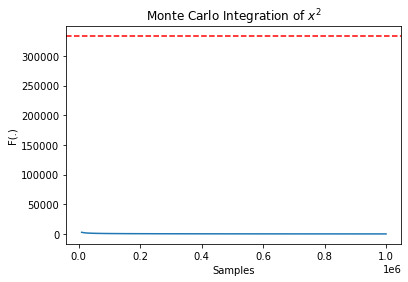

In [4]:
# Domain over which to evaluate integral
domain = (0, 100)

# Function to integrate
def f(row):
    return row["X"]**2

# Definite integral of the function for comparison
def F(domain):
    return (domain[1]**3)/3 - (domain[0]**3)/3

# Define an empty data frame
df = pd.DataFrame(columns = ("X", "Y"))

# Empty list for errors
iterations = []
values = []
errors = []

print(f"The analytical value of the integral: {F(domain)}\n")
print("Samples" + " " * 3 + "Monte Carlo Integral" + " " * 3 + "Error")
print("-" * 60)
for i in range(0,100):

    # Create 10'000 samples drawn from a uniform distribution 
    dfNew = pd.DataFrame(columns = ("X",), data = np.random.uniform(domain[0], domain[1], 10000))
    dfNew['Y'] = dfNew.apply(f, axis=1)
    df = pd.concat([df, dfNew], axis=0)

    # Find the mean value of the function
    meanValue = df['Y'].mean()
    varianceValue = df['Y'].var()
    
    # Find the integral calculated over the domain
    calculatedIntegral = meanValue * (domain[1] - domain[0])
    calculatedError = (domain[1] - domain[0])*(np.sqrt(varianceValue))/np.sqrt((i+1)*10000)
    
    values.append(calculatedIntegral)
    errors.append(calculatedError)
    iterations.append((i+1)*10000)
    
    # Display results
    print(f"{(i+1)*10000}     {calculatedIntegral:<8} {calculatedError:<8}")
    
plt.plot(iterations,errors)
plt.axhline(F(domain), color="r", linestyle="--")
plt.xlabel("Samples")
plt.ylabel("F(.)")
plt.title("Monte Carlo Integration of $x^2$")
plt.show()

## Calculating the Integral of $\mathrm{e}^{-\sin(x^2)}$

We can calculate a more complex integral using the same Monte-Carlo method.

Samples   IntegralIntegralIntegralEstimated Error
------------------------------------------------------------
   50000     0.727370   0.002160
  100000     0.725560   0.001525
  150000     0.726598   0.001247
  200000     0.726593   0.001081
  250000     0.727099   0.000968
  300000     0.726874   0.000882
  350000     0.726508   0.000816
  400000     0.726509   0.000764
  450000     0.726510   0.000720
  500000     0.725864   0.000682
  550000     0.725769   0.000650
  600000     0.725709   0.000623
  650000     0.726046   0.000599
  700000     0.725959   0.000577
  750000     0.725734   0.000557
  800000     0.725933   0.000540
  850000     0.725937   0.000523
  900000     0.725970   0.000509
  950000     0.725852   0.000495
 1000000     0.725912   0.000483
 1050000     0.725702   0.000471
 1100000     0.725693   0.000460
 1150000     0.725909   0.000450
 1200000     0.725865   0.000441
 1250000     0.725845   0.000432
 1300000     0.725849   0.000423
 1350000     0.725756   0.00041

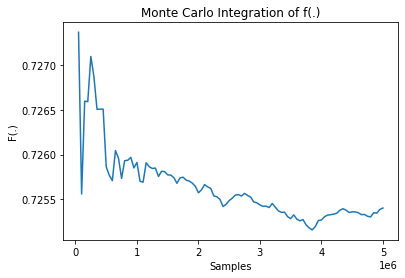

In [5]:
# Domain over which to evaluate integral
domain = (1, 2)

# Function to integrate
def f(x):
    return np.exp(-np.sin(x**2))

# Create n samples drawn from a uniform distribution 
n = 5000000
df = pd.DataFrame(columns = ("X",), data = np.random.uniform(domain[0], domain[1], n))
# User numpy vectorize rather than pandas apply to increase speed 
df['Y'] = np.vectorize(f)(df["X"])

# Empty list for errors
iterations = []
errors = []

print("Samples" + " " * 3 + "Integral" * 3 + "Estimated Error")
print("-" * 60)
step = 50000
for i in range(step, n+step, step):

    # Find the mean value of the function
    meanValue = df[0:i]['Y'].mean()
    
    # Find the variance of the function
    varianceValue = df[0:i]['Y'].var()

    # Find the error
    error = np.sqrt(varianceValue / i) * (domain[1] - domain[0])
    
    # Find the integral calculated over the domain
    calculatedIntegral = meanValue * (domain[1] - domain[0])

    errors.append(calculatedIntegral)
    iterations.append(i)
    
    # Display results
    print(f"{i:8d}     {calculatedIntegral:8f}   {error:8f}")
    
plt.plot(iterations,errors)
plt.xlabel("Samples")
plt.ylabel("F(.)")
plt.title("Monte Carlo Integration of f(.)")
plt.show()

## Calculating a Double Integral

The variable $V$ denotes the volume of the region we wish to integrate (i.e. the domain of $f(.)$).

In [428]:
# The function to integrate
def f(x, y):
    return (x**2 + y**2)**2

# The volume over which we will integrate is the area of the unit circle
V = np.pi

# Create n samples drawn from a uniform distribution 
n = 1000000
df = pd.DataFrame(
    columns = ("X", "Y"), 
    data = np.random.uniform((-1,-1), (1,1), (n, 2)))

df = df[(df["X"]**2 + df["Y"]**2) <= 1]

# User numpy vectorize rather than pandas apply to increase speed 
df["Z"] = np.vectorize(f)(df["X"], df["Y"])

# Calculate the integral for an increasing number of points
print(" Samples" + " " * 5 + "Integral" + " " * 3 + "Error Est.")
print("-" * 35)
iterations = []
values = []
errors = []
step = 5000
for i in range(step, n+step, step):

    # Calculate the integral over the domain
    meanValue = df[0:i]['Z'].mean()
    calculatedIntegral = meanValue * V
    iterations.append(i)
    values.append(calculatedIntegral)

    # Calculate the estimated error
    varianceValue = df[0:i]['Z'].var()
    error = np.sqrt(varianceValue / i) * V
    errors.append(error)
        
    # Display results
    print(f"{i:8d}     {calculatedIntegral:8f}   {error:8f}")


 Samples     Integral   Error Est.
-----------------------------------
    5000     1.039502   0.013223
   10000     1.045372   0.009328
   15000     1.047569   0.007619
   20000     1.046002   0.006607
   25000     1.042802   0.005909
   30000     1.046070   0.005404
   35000     1.048696   0.005007
   40000     1.048575   0.004675
   45000     1.047816   0.004408
   50000     1.048396   0.004183
   55000     1.048077   0.003993
   60000     1.046961   0.003821
   65000     1.047255   0.003674
   70000     1.047454   0.003539
   75000     1.046425   0.003418
   80000     1.045017   0.003307
   85000     1.045344   0.003209
   90000     1.046976   0.003122
   95000     1.047623   0.003039
  100000     1.047800   0.002962
  105000     1.048373   0.002891
  110000     1.049728   0.002826
  115000     1.049636   0.002765
  120000     1.050274   0.002708
  125000     1.049918   0.002652
  130000     1.049894   0.002600
  135000     1.050077   0.002552
  140000     1.050795   0.002506
  145

Print the results and plot the calculated integral as a function of the number of samples.

Iterations: 1000000
Estimated error: 0.0009371213173074315
Calculated integral: 1.048725998436991
Analytical solution: 1.0471975511965976


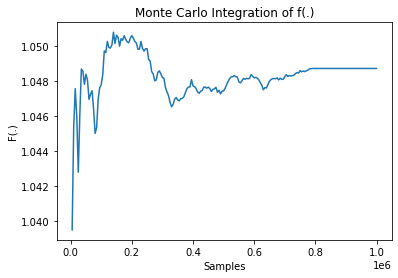

In [429]:
# Print the results 
print(f"Iterations: {iterations[-1]}")
print(f"Estimated error: {errors[-1]}")
print(f"Calculated integral: {values[-1]}")
print(f"Analytical solution: {np.pi/3}")
    
# Plot the integral as a function of points
plt.plot(iterations, values)
plt.xlabel("Samples")
plt.ylabel("F(.)")
plt.title("Monte Carlo Integration of f(.)")
plt.show()


## Recursive Stratified Sampling

The variance for a partition is calculated as the sum of the ratio between variance and number of samples for each partition:

$$ Var(f) = \frac{\sigma^2_a(f)}{4Na} + \frac{\sigma^2_a(f)}{4Nb} $$

The expectation is calculated as the mean of the expected value for each partition:

$$ E(f) = \frac{1}{2}\left(E_a(f) + E_b(f)\right) $$



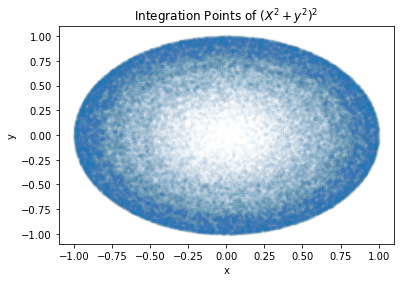

,theta,r,Z,xTransformed,yTransformed
0,2.540514,0.999430,9.977218e-01,-0.824256,0.565210
1,5.342661,0.999309,9.972379e-01,0.588957,-0.807309
2,6.244685,0.999248,9.969939e-01,0.998507,-0.038462
3,1.451596,0.999225,9.969017e-01,0.118826,0.992134
4,2.511616,0.999700,9.987986e-01,-0.807798,0.588949
...,...,...,...,...,...
1,2.522554,0.085696,5.393082e-05,-0.069794,0.049725
2,3.620580,0.084276,5.044353e-05,-0.074791,-0.038841
3,5.273892,0.075124,3.185095e-05,0.040001,-0.063589
0,2.693071,0.028035,6.177134e-07,-0.025262,0.012157


In [430]:
# The function to integrate
def f(theta, r):
    
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    
    result = (x**2 + y**2)**2  
    
    return result

def half(t):
    x = np.sqrt((t[1]**2)/2 + (t[0]**2)/2)
    #print(f"{t} {x}")
    return x

def rss(N, k, boundX, boundY, maxError, maxDepth, depth=1):
    
    # Sample k points
    if(depth >= maxDepth
      or N <= 4):
        nThisDraw = N
    else:
        nThisDraw = 100
    
    dfPoints = pd.DataFrame(
        columns = ("X", "Y"), 
        data = np.random.uniform((boundX[0],boundY[0]**2), (boundX[1],boundY[1]**2), (nThisDraw, 2)))
    
    dfPoints["Y"] = np.sqrt(dfPoints["Y"])
    
    # User numpy vectorize rather than pandas apply to increase speed 
    dfPoints["Z"] = np.vectorize(f)(dfPoints["X"], dfPoints["Y"])
    
    # Points in circle
    dfPointsInCircle = dfPoints
    V = (boundY[1]**2)*(abs(boundX[1] - boundX[0])/2) - (boundY[0]**2)*(abs(boundX[1] - boundX[0])/2)
    #print(f"v {V}")
    # Calculate the mean, variance and error
    mean = dfPoints["Z"].mean()
    variance = dfPoints["Z"].var()
    error = np.sqrt(variance / dfPoints.shape[0]) * V
    #print(f"{error} > {maxError}, {depth} < {maxDepth}, {N} > {k}")
    # If error nor acceptable and max depth not reached
    if(error > maxError 
      and depth < maxDepth
      and N > 4):   
        df1 = dfPoints[dfPoints["X"] > np.mean(boundX)] 
        df2 = dfPoints[dfPoints["X"] <= np.mean(boundX)]
        df3 = dfPoints[dfPoints["Y"] > half(boundY)]
        df4 = dfPoints[dfPoints["Y"] <= half(boundY)]
        
        if(df1.shape[0] > 0
          and df2.shape[0] > 0
          and df3.shape[0] > 0
          and df4.shape[0] > 0):

            var1 = df1["Z"].var()/(4*df1.shape[0]) + df2["Z"].var()/(4*df2.shape[0])
            var2 = df3["Z"].var()/(4*df3.shape[0]) + df4["Z"].var()/(4*df4.shape[0])
            var1 = df1["Z"].var()/(4*df1.shape[0]) + df2["Z"].var()/(4*df2.shape[0])
            var2 = df3["Z"].var()/(4*df3.shape[0]) + df4["Z"].var()/(4*df4.shape[0])

            # Split along x direction
            if(var1 < var2):  
                Na = int(N*np.sqrt(df1["Z"].var())/(np.sqrt(df1["Z"].var())+np.sqrt(df2["Z"].var())))
                Nb = N - Na
                if(Na > 0):
                    valueSub1, varianceSub1, dfPointsSub1 = rss(Na, k, (np.mean(boundX), boundX[1]), boundY, maxError, maxDepth, depth+1)
                else:
                    valueSub1 = varianceSub1 = dfPointsSub1 = None
                if(Nb > 0):
                    valueSub2, varianceSub2, dfPointsSub2 = rss(Nb, k, (boundX[0], np.mean(boundX)), boundY, maxError, maxDepth, depth+1)
                else:
                    valueSub2 = varianceSub2 = dfPointsSub2 = None
            # Else split along y direction
            else:
                Na = int(N*np.sqrt(df3["Z"].var())/(np.sqrt(df3["Z"].var())+np.sqrt(df4["Z"].var())))
                Nb = N - Na
                if(Na > 0):
                    valueSub1, varianceSub1, dfPointsSub1 = rss(Na, k, boundX, (half(boundY), boundY[1]), maxError, maxDepth, depth+1)
                else:
                    valueSub1 = varianceSub1 = dfPointsSub1 = None
                if(Nb > 0):
                    valueSub2, varianceSub2, dfPointsSub2 = rss(Nb, k, boundX, (boundY[0], half(boundY)), maxError, maxDepth, depth+1)
                else:
                    valueSub2 = varianceSub2 = dfPointsSub2 = None
            
            if(Na == 0 or Nb == 0):
                raise RuntimeError(f"Failure Na:{Na} Nb:{Nb}")
            
            # Final estimate
            varianceFinal = varianceSub1/(4*Na) + varianceSub2/(4*Nb)
            valueFinal = valueSub1 + valueSub2
            dfPointsFinal = pd.concat([dfPointsSub1, dfPointsSub2], axis=0)
                
            return valueFinal, varianceFinal, dfPointsFinal
    # Only points in circle
    if(dfPointsInCircle.shape[0] > 0):
        v = dfPointsInCircle["Z"].var()
        if(np.isnan(v)):
            v = 0
        return dfPointsInCircle["Z"].mean()*V, v, dfPointsInCircle
    else:
        return None, None, None

# The volume over which we will integrate is the area of the unit circle
N = 100000
boundTheta = (0, 2*np.pi)
boundR = (0, 1)
maxError = 0.00000000000000001
maxDepth = 10

calculatedIntegral, varianceValue, df = rss(N, 0.01, boundTheta, boundR, maxError, maxDepth)

# Rename the columns
df.rename(columns={"X" : "theta", "Y" : "r"}, inplace=True)

# Transform the data
df["xTransformed"] = df["r"]*np.cos(df["theta"])
df["yTransformed"] = df["r"]*np.sin(df["theta"])

plt.scatter(df["xTransformed"], df["yTransformed"], marker='.', alpha=0.02)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Integration Points of $(X^2+y^2)^2$")
#plt.scatter(df["X"], df["Y"], marker='.', alpha=0.1)
plt.show()

#df = df[(df["X"]**2 + df["Y"]**2) <= 1]
df

In [427]:
# Calculate the estimated error
#error = np.sqrt(varianceValue / i) * V

# Print the results 
print(f"Estimated error: {error}")
print(f"Calculated integral: {calculatedIntegral}")
print(f"Analytical solution: {np.pi/3}")


Estimated error: 4.4667487369589883e-07
Calculated integral: 1.0471900224189767
Analytical solution: 1.0471975511965976
